<a href="https://colab.research.google.com/github/adancalderon/MLintro/blob/main/KNN_COMP_4980_Winter_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def genTrainData(n):
  td = { "x" : np.random.randn(n),
         'y' : np.random.randn(n),
         'c' : np.random.randint(0,2,n)   }

  offset = 2uP 

  for i in range(n):
    if td['c'][i] == 1:
      td['x'][i] += offset
      td['y'][i] += offset

  return td

In [ ]:
from sklearn.datasets import make_blobs

X,y = make_blobs(1000,centers=3, n_features=3, cluster_std=[3,3,3])

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


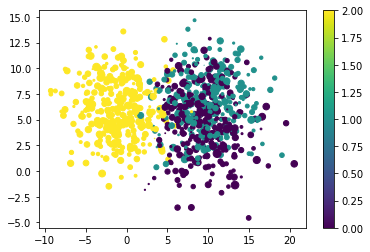

In [ ]:
plt.scatter(X[:,0], X[:,1], s=X[:,2]*5+15, c = y)
plt.colorbar()
plt.show()

In [ ]:
X

array([[-2.34164164,  5.7831504 ,  0.33331516],
       [-3.00733171,  9.34471432,  4.00794797],
       [ 8.05027317,  6.38991784, -1.42606535],
       ...,
       [ 9.93980814,  4.17597375,  1.28174798],
       [12.18774878,  2.00449571, -0.53593648],
       [ 6.62069649,  6.29092999,  3.38916711]])

In [ ]:
def getKNN(test, train, k):
  distances = []
  f = len(train[0])

  for i in range( len(X) ):
    p = X[i]
    d = 0

    xd = (test[0] - train['x'][i])
    yd = (test[1] - train['y'][i])
    d = np.sqrt(xd ** 2 + yd ** 2) # Euclidean distance
    distances.append( [ d, train["c"][i] ] )

  distances.sort(key = lambda p : p[0])

  return distances[:k]

In [ ]:
def classify(ds):
  counts = [0,0]
  for i in range(len(ds)):
    if ds[i][1] == 0:
      counts[0] += 1
    else:
      counts[1] += 1

  if counts[0] > counts[1]:
    return 0
  elif counts[0] == counts[1]:
    return np.randint(0,2)
  else:
    return 1

It probably belongs to class:  0


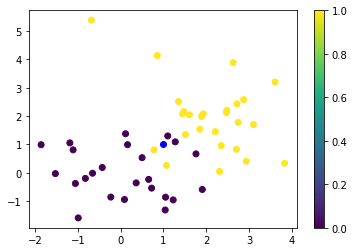

In [ ]:
data = genTrainData(50)
test = [1,1]
plt.scatter('x','y',c='c', data = data)
plt.scatter( test[0], test[1], c = 'blue')
plt.colorbar()

c = classify( getKNN( test, data, 9))
print("It probably belongs to class: ", c)

**Using the methods from the Sci-Kit Learn library:**

In [ ]:
from sklearn.datasets import make_blobs

X,y = make_blobs(200,centers=2, cluster_std=[4,2])

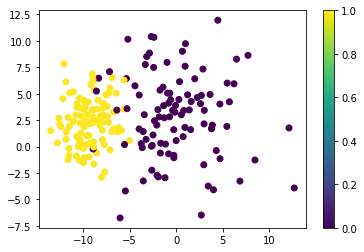

In [ ]:
plt.figure()
plt.scatter(X[:,0],X[:,1],c=y)
plt.colorbar()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=19) # instantiate

clf.fit(X_train, y_train) # learn
y_pred = clf.predict(X_test) # test


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.95

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[12  2]
 [ 0 26]]
              precision    recall  f1-score   support

           0       1.00      0.86      0.92        14
           1       0.93      1.00      0.96        26

    accuracy                           0.95        40
   macro avg       0.96      0.93      0.94        40
weighted avg       0.95      0.95      0.95        40



In [ ]:
error = []

for i in range(1,20):
  clf = KNeighborsClassifier(n_neighbors=i)
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  error.append(1-accuracy_score(y_test,y_pred))

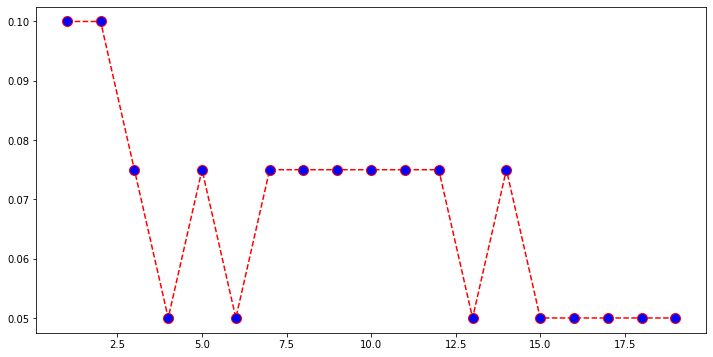

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(range(1,20), error, color='red', linestyle='dashed', marker = 'o', markerfacecolor = 'blue', markersize=10)
